In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get model

In [2]:
from tensorflow.keras.models import load_model
PATH = '/content/drive/MyDrive/machine_learning/phan_biet_cho_meo/'
!ls '/content/drive/MyDrive/machine_learning/phan_biet_cho_meo/'
model=load_model(PATH + 'bestModel.h5')

2.DataProcessingLayer.ipynb  cats_and_dog_large        FullData_Cats-Dogs.zip
bestModel.h5		     FullData_Cats-Dogs.ipynb  image.png


# Import module_lib

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib
import numpy as np
import os
import requests
import pandas as pd

# Generate

In [4]:
# generate
BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

# Get Image from URL

In [5]:
# import from url
img_url = 'https://kynguyenlamdep.com/wp-content/uploads/2022/01/hinh-anh-meo-con-sieu-cute-scaled.jpg'
img_data = requests.get(img_url).content
!mkdir /content/sample_data/picture
!touch /content/sample_data/picture/image.jpg
with open('/content/sample_data/picture/image.jpg', 'wb') as handler:
    handler.write(img_data)

# Load picture and show

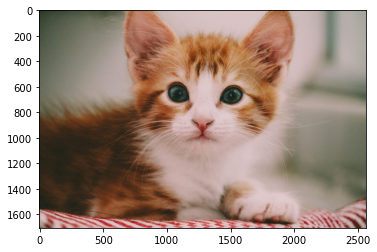

In [6]:
# import image form local
img_path = '/content/sample_data/picture/image.jpg'
image_show = cv2.imread(img_path)
image_show = cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB)
plt.imshow(image_show)
plt.show()

# Phân biệt theo giống chó mèo

In [7]:
# giống chó, giống mèo
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
model = tf.keras.applications.resnet50.ResNet50()
prediction = model.predict(img_preprocessed)
result = decode_predictions(prediction)
print(result)
print(result[0][0][1])

49152/35363 [=========================================] - 0s 0us/step
[[('n02123045', 'tabby', 0.36583117), ('n02123159', 'tiger_cat', 0.25025105), ('n02124075', 'Egyptian_cat', 0.15318796), ('n02971356', 'carton', 0.023452444), ('n02909870', 'bucket', 0.02239099)]]
tabby
